## [2024년 1학기 로봇공학] Ch. 1. Import a Robot

- 작성자 : 서울시립대학교 전자전기컴퓨터공학부 박경훈 교수(gyunghoon.park@uos.ac.kr)
- 작성일 : 2024. 3. 26.

In [38]:
import spatialgeometry as sg
import spatialmath as sm
import roboticstoolbox as rtb
import numpy as np
from spatialmath.base import *
from math import *
from scipy import *
from roboticstoolbox.backends import swift
env = swift.Swift()

이 파일에서는 Robotics Toolbox for Python에서 활용하는, 하나의 로봇에 대한 3가지 표현법들의 사용을 배웁니다. 
- Elementary transformation sequence (ETS)

설명의 편의를 위해, 이번 파일에서는 Franka Emika Panda 로봇을 불러오는 법을 다루겠습니다.

### #1. ETS Model

In [39]:
rtb.models.list(type="ETS")

┌─────────────┬───────────────┬─────────────────────┬──────┬─────┬──────┬───────────┬──────────┬──────────┬──────────┐
│   class     │     name      │    manufacturer     │ type │ DoF │ dims │ structure │ dynamics │ geometry │ keywords │
├─────────────┼───────────────┼─────────────────────┼──────┼─────┼──────┼───────────┼──────────┼──────────┼──────────┤
│Panda        │ Panda         │ Franka Emika        │ ETS  │ 7   │ 3d   │ RRRRRRR   │          │          │          │
│Frankie      │ Frankie       │ Franka Emika, Omron │ ETS  │ 9   │ 3d   │ RPRRRRRRR │          │          │ mobile   │
│Puma560      │ Puma560       │ Unimation           │ ETS  │ 6   │ 3d   │ RRRRRR    │          │          │          │
│Planar_Y     │ Planar-Y      │                     │ ETS  │ 6   │ 3d   │ RRRRRR    │          │          │          │
│GenericSeven │ Generic Seven │ Jesse's Imagination │ ETS  │ 7   │ 3d   │ RRRRRRR   │          │          │          │
│XYPanda      │ XYPanda       │ Franka Emika    

In [40]:
pandaETS = rtb.models.ETS.Panda()
print(pandaETS)

ERobot: Panda (by Franka Emika), 7 joints (RRRRRRR)
┌─────┬───────┬───────┬────────┬─────────────────────────────────────────────┐
│link │ link  │ joint │ parent │             ETS: parent to link             │
├─────┼───────┼───────┼────────┼─────────────────────────────────────────────┤
│   0 │ link0 │     0 │ BASE   │ tz(0.333) ⊕ Rz(q0)                          │
│   1 │ link1 │     1 │ link0  │ Rx(-90°) ⊕ Rz(q1)                           │
│   2 │ link2 │     2 │ link1  │ Rx(90°) ⊕ tz(0.316) ⊕ Rz(q2)                │
│   3 │ link3 │     3 │ link2  │ tx(0.0825) ⊕ Rx(90°) ⊕ Rz(q3)               │
│   4 │ link4 │     4 │ link3  │ tx(-0.0825) ⊕ Rx(-90°) ⊕ tz(0.384) ⊕ Rz(q4) │
│   5 │ link5 │     5 │ link4  │ Rx(90°) ⊕ Rz(q5)                            │
│   6 │ link6 │     6 │ link5  │ tx(0.088) ⊕ Rx(90°) ⊕ tz(0.107) ⊕ Rz(q6)    │
│   7 │ @ee   │       │ link6  │ tz(0.103) ⊕ Rz(-45°)                        │
└─────┴───────┴───────┴────────┴─────────────────────────────────────────────┘


여기서 qr, qz는 미리 설정된 Panda의 configuration vector들이며, 아래와 같이 출력 가능합니다.

In [41]:
print(pandaETS.qr)

[ 0.         -0.3         0.         -2.2         0.          2.
  0.78539816]


만약 다른 configuration을 추가하고 싶다면, 아래와 같이 . 

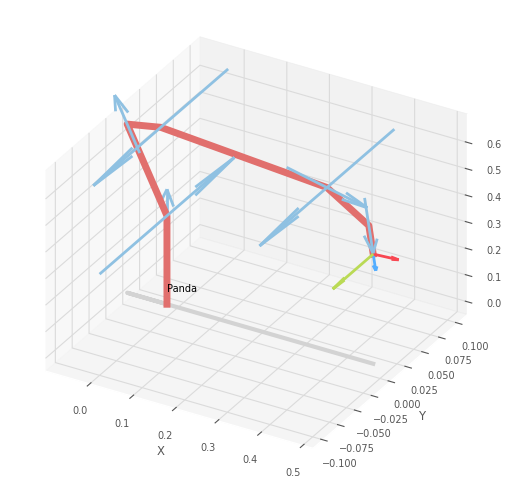

PyPlot3D backend, t = 0.05, scene:
  robot: Text(0.0, 0.0, 'Panda')

<Figure size 640x480 with 0 Axes>

In [42]:
panda.plot(panda.qr)

### #2. Import a URDF Model

In [43]:
rtb.models.list(type="URDF")

┌────────────┬───────────────────────┬────────────────────┬──────┬─────┬──────┬────────────────────────────────────────────────────────────┬──────────┬──────────┬──────────┐
│   class    │         name          │    manufacturer    │ type │ DoF │ dims │                                                  structure │ dynamics │ geometry │ keywords │
├────────────┼───────────────────────┼────────────────────┼──────┼─────┼──────┼────────────────────────────────────────────────────────────┼──────────┼──────────┼──────────┤
│Panda       │ panda                 │ Franka Emika       │ URDF │ 7   │ 3d   │ RRRRRRR                                                    │          │ Y        │          │
│Frankie     │ frankie               │ Franka Emika       │ URDF │ 9   │ 3d   │ RPRRRRRRR                                                  │          │ Y        │          │
│FrankieOmni │ FrankieOmni           │ Custom             │ URDF │ 10  │ 3d   │ PPRRRRRRRR                                        

  **참고**
- Swift가 제대로 동작하지 않는 경우에는, Swift Library 내의 SwiftRoute.py의 특정 경로를 새로 지정해주서야 합니다. 
- swift 파일 위치는 print 함수를 통해 얻을 수 있습니다.
- 자세한 사항은 아래 링크의 내용을 확인해보시기 바랍니다. (https://github.com/petercorke/robotics-toolbox-python/issues/383)

In [1]:
print(swift)

NameError: name 'swift' is not defined

In [45]:
pandaURDF = rtb.models.URDF.Panda()
pandaURDF.plot(pandaURDF.qr)

Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link0.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link1.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link2.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link3.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link4.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link5.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/me

Swift backend, t = 0.05, scene:
  panda

In [46]:
print(pandaURDF)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌─────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│link │     link     │ joint │   parent    │              ETS: parent to link               │
├─────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│   0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│   1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│   2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│   3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│   4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│   5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│   6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0°) ⊕ Rz(q5

In [47]:
env = pandaURDF.plot(panda.qr, backend="swift");
from spatialgeometry import Cuboid
box = Cuboid([1, 1, 1], pose=sm.SE3.Tx(1.1));

env.add(box); # add box to graphics
env.step() # update the graphics

Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link0.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link1.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link2.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link3.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link4.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link5.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/me

In [48]:
# Make and instance of the Swift simulator and open it
env = swift.Swift()
env.launch(realtime=True)

# Set a desired and effector pose an an offset from the current end-effector pose
Tep = pandaURDF.fkine(panda.q) * sm.SE3.Tx(0.2) * sm.SE3.Ty(0.2) * sm.SE3.Tz(0.45)

# Add the robot to the simulator
env.add(pandaURDF)

# Simulate the robot while it has not arrived at the goal
arrived = False
while not arrived:
    # Work out the required end-effector velocity to go towards the goal
    v, arrived = rtb.p_servo(pandaURDF.fkine(pandaURDF.q), Tep, 1)
    
    # Set the Panda's joint velocities
    pandaURDF.qd = np.linalg.pinv(pandaURDF.jacobe(pandaURDF.q)) @ v
    
    # Step the simulator by 50 milliseconds
    env.step(0.001)

Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link0.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link1.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link2.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link3.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link4.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/meshes/visual/link5.dae
Retrieving file: C:/Users/user/AppData/Local/Programs/Python/Python312/Lib/site-packages/rtbdata/xacro/franka_description/me

### #3. DH Models

In [ ]:
rtb.models.list(type="DH")

In [ ]:
pandaDH = rtb.models.DH.Panda()
print(pandaDH)

In [ ]:
pandaDH.plot(pandaDH.qr)